In [26]:
#!pip install numpy
#!pip install pandas
#!pip install matplotlib
#!pip install scipy
#!pip install openpyxl

#!pip install mathjax


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from scipy import optimize
from scipy import stats

import scipy as sp

plt.rcParams['text.usetex'] = True

## 4.1

#### aus PC

In [27]:
A1_UAMuSigmaB = np.array([[600, 12702.1, 43, 2, 188.1], [630, 10791.4, 61, 3, 219.1], [660, 8575.0, 84, 4, 93.6], [690, 6531.2, 117, 6, 65], [720, 4879.7, 159, 8, 71], [750, 3737.2, 214, 10, 69.8]])
#U A Mu Sigma B Cs-137

U_DF = pd.DataFrame(np.transpose(A1_UAMuSigmaB[:,0]))
A1_UAMuSigmaB

array([[6.00000e+02, 1.27021e+04, 4.30000e+01, 2.00000e+00, 1.88100e+02],
       [6.30000e+02, 1.07914e+04, 6.10000e+01, 3.00000e+00, 2.19100e+02],
       [6.60000e+02, 8.57500e+03, 8.40000e+01, 4.00000e+00, 9.36000e+01],
       [6.90000e+02, 6.53120e+03, 1.17000e+02, 6.00000e+00, 6.50000e+01],
       [7.20000e+02, 4.87970e+03, 1.59000e+02, 8.00000e+00, 7.10000e+01],
       [7.50000e+02, 3.73720e+03, 2.14000e+02, 1.00000e+01, 6.98000e+01]])

In [28]:
def funca(A, Mu, Sigma, B):
    h = (A + B) / 2
    func = lambda x : A * np.exp(-(x-Mu)**2 / (2 * Sigma**2)) + B - h
    guess = Mu + 3
    aussen = optimize.fsolve(func, guess)
    return 2 * np.abs(Mu - aussen)

In [29]:
a_digital = np.zeros(6)
for i in range(0, 6): 
    #a_digital[i] = funca(A1_UAMuSigmaB[i, 1], A1_UAMuSigmaB[i, 2], A1_UAMuSigmaB[i, 3], A1_UAMuSigmaB[i, 4])
    a_digital[i] = 2.35 * A1_UAMuSigmaB[i, 3]

a_digital_DF = pd.DataFrame(np.round(np.transpose(a_digital), 1))
b_digital_DF = pd.DataFrame(np.round(A1_UAMuSigmaB[:,2], 1))
a_digital_DF, b_digital_DF

(      0
 0   4.7
 1   7.0
 2   9.4
 3  14.1
 4  18.8
 5  23.5,
        0
 0   43.0
 1   61.0
 2   84.0
 3  117.0
 4  159.0
 5  214.0)

In [30]:
x = np.linspace(0, 500, 500)

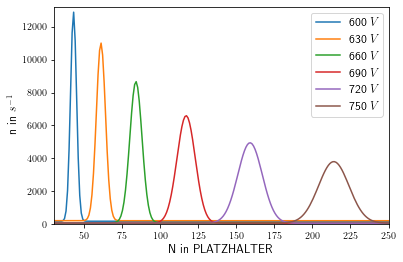

In [31]:
plt.plot(x, A1_UAMuSigmaB[0, 1] * np.exp(-(x-A1_UAMuSigmaB[0, 2])**2 / (2 *  A1_UAMuSigmaB[0, 3]**2)) + A1_UAMuSigmaB[0, 4], label = '600 $V$' )
plt.plot(x, A1_UAMuSigmaB[1, 1] * np.exp(-(x-A1_UAMuSigmaB[1, 2])**2 / (2 *  A1_UAMuSigmaB[1, 3]**2)) + A1_UAMuSigmaB[1, 4], label = '630 $V$' )
plt.plot(x, A1_UAMuSigmaB[2, 1] * np.exp(-(x-A1_UAMuSigmaB[2, 2])**2 / (2 *  A1_UAMuSigmaB[2, 3]**2)) + A1_UAMuSigmaB[2, 4], label = '660 $V$' )
plt.plot(x, A1_UAMuSigmaB[3, 1] * np.exp(-(x-A1_UAMuSigmaB[3, 2])**2 / (2 *  A1_UAMuSigmaB[3, 3]**2)) + A1_UAMuSigmaB[3, 4], label = '690 $V$' )
plt.plot(x, A1_UAMuSigmaB[4, 1] * np.exp(-(x-A1_UAMuSigmaB[4, 2])**2 / (2 *  A1_UAMuSigmaB[4, 3]**2)) + A1_UAMuSigmaB[4, 4], label = '720 $V$' )
plt.plot(x, A1_UAMuSigmaB[5, 1] * np.exp(-(x-A1_UAMuSigmaB[5, 2])**2 / (2 *  A1_UAMuSigmaB[5, 3]**2)) + A1_UAMuSigmaB[5, 4], label = '750 $V$' )

plt.legend(fontsize = 12)

plt.xlabel('N in PLATZHALTER', fontsize = 12)
plt.ylabel('n in $s^{-1}$', fontsize = 12)

plt.ylim([0, 13200])
plt.xlim([30, 250])

plt.savefig('Cs137 Spannung.png', dpi=300)

In [32]:
KR_digital = np.zeros([2,6]) # np.zeros([3,6]) 

for i in range(0, 6):
    KR_digital[0, i] = a_digital[i] / np.sqrt(A1_UAMuSigmaB[i, 2])
    KR_digital[1, i] = KR_digital[0,i] / np.sqrt(A1_UAMuSigmaB[i, 2]) *100 #Prozent
    #KR_digital[2, i] = a_digital[i] / A1_UAMuSigmaB[i, 2] *100 #Prozent

KR_Digital_DF = pd.DataFrame(np.round(np.transpose(KR_digital), 1))
KR_digital, KR_Digital_DF

(array([[ 0.71674328,  0.90266   ,  1.02562408,  1.30354546,  1.49093698,
          1.60642693],
        [10.93023256, 11.55737705, 11.19047619, 12.05128205, 11.82389937,
         10.98130841]]),
      0     1
 0  0.7  10.9
 1  0.9  11.6
 2  1.0  11.2
 3  1.3  12.1
 4  1.5  11.8
 5  1.6  11.0)

### Grafisch

In [33]:
ab_grafisch = np.array([[0.3,0.4,0.5,0.6,1,1.4], [2.8, 4.0, 5.5, 7.6, 10.3, 13.9]])

KR_grafisch = np.zeros([2,6]) # np.zeros([3,6]) 

for i in range(0, 6):
    KR_grafisch[0, i] = ab_grafisch[0, i] / np.sqrt(ab_grafisch[1, i])
    KR_grafisch[1, i] = KR_grafisch[0 ,i] / np.sqrt(ab_grafisch[1, i]) *100 #Prozent
    #KR_grafisch[2, i] = ab_grafisch[0 ,i] / ab_grafisch[1, i] *100 #Prozent

KR_grafisch, ab_grafisch
ab_grafisch_DF = pd.DataFrame(np.round(np.transpose(ab_grafisch), 1))
KR_grafisch_DF = pd.DataFrame(np.round(np.transpose(KR_grafisch), 1))
ab_grafisch_DF


,0,1
0,0.3,2.8
1,0.4,4.0
2,0.5,5.5
3,0.6,7.6
4,1.0,10.3
5,1.4,13.9


### Vergleich

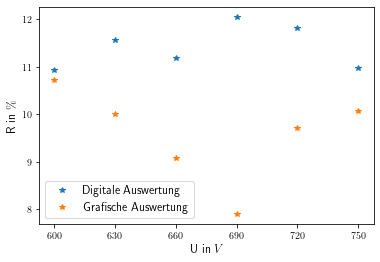

In [34]:
plt.plot(A1_UAMuSigmaB[:, 0], KR_digital[1, :] ,'*', label = 'Digitale Auswertung' )
plt.plot(A1_UAMuSigmaB[:, 0], KR_grafisch[1, :] , '*', label = 'Grafische Auswertung' )


plt.legend(fontsize = 12)

plt.xlabel('U in $V$', fontsize = 12)
plt.ylabel('R in $\%$', fontsize = 12)

#values = ['A', 'B', 'C', 'D','E','F'] 

plt.xticks(A1_UAMuSigmaB[:, 0])

#plt.ylim([0, 13000])
#plt.xlim([0, 250])

plt.savefig('Vergleich.png', dpi=300)

In [35]:
Export_1 = pd.concat([ U_DF , a_digital_DF , b_digital_DF , KR_Digital_DF , ab_grafisch_DF , KR_grafisch_DF],axis = 1, sort = False )
Export_1.to_csv('41.csv',index=False)
Export_1

,0,0,0,0,1,0,1,0,1
0,600.0,4.7,43.0,0.7,10.9,0.3,2.8,0.2,10.7
1,630.0,7.0,61.0,0.9,11.6,0.4,4.0,0.2,10.0
2,660.0,9.4,84.0,1.0,11.2,0.5,5.5,0.2,9.1
3,690.0,14.1,117.0,1.3,12.1,0.6,7.6,0.2,7.9
4,720.0,18.8,159.0,1.5,11.8,1.0,10.3,0.3,9.7
5,750.0,23.5,214.0,1.6,11.0,1.4,13.9,0.4,10.1


## 4.2

In [36]:
A2_UAMuSigmaB = np.array([750, 3697.2, 215, 10, 57.4])
#U A Mu Sigma B Cs-137
A2_UAMuSigmaB 

array([ 750. , 3697.2,  215. ,   10. ,   57.4])

## 4.3

In [37]:
A3_ComptonkanteRückstreulinie = np.array([[481.7, 215.5] #Cs-137
, [967.7, 249.4] #Co-60
, [33.8, 24.3] #Am-241
, [33.1, 22.1] #Sr-90
, [33.4, 28]]) #Ra-226

A3_ComptonkanteRückstreulinie

array([[481.7, 215.5],
       [967.7, 249.4],
       [ 33.8,  24.3],
       [ 33.1,  22.1],
       [ 33.4,  28. ]])

## 4.4

In [38]:
A4_xNa = np.array([
  [29, 24, 19, 28, 74, 63, 55, 77, 71, 67, 65] #Abstand in mm
, [4423, 5265, 6317, 4682, 674.0, 1025, 1253, 672.0, 767.0, 877.0, 928.0]] ) # Na pro 100s

#Sortieren (nur zur übersicht)
A4_xNa[0, :] =  np.sort(A4_xNa[0, :])
A4_xNa[1, :] =  np.sort(A4_xNa[1, :])[::-1]

A4_xNa[1, :] = A4_xNa[1, :] * 0.01

A4_xNa

array([[19.  , 24.  , 28.  , 29.  , 55.  , 63.  , 65.  , 67.  , 71.  ,
        74.  , 77.  ],
       [63.17, 52.65, 46.82, 44.23, 12.53, 10.25,  9.28,  8.77,  7.67,
         6.74,  6.72]])

In [39]:
x = np.linspace(0, 95, num = 100)

In [40]:
def funcAbstand(x, A, B):
    return A/(x**2) + B

popt, pcov = optimize.curve_fit(funcAbstand, A4_xNa[0, :], A4_xNa[1, :], p0=(2222, 7))

A, B = popt

Fit = funcAbstand(x, A, B)

popt

C:\Users\schle\AppData\Local\Temp/ipykernel_14308/2252598128.py:2: RuntimeWarning: divide by zero encountered in true_divide
  return A/(x**2) + B


array([2.47496643e+04, 5.17395152e+00])

In [41]:
I0 = funcAbstand(95, A, B)
I0

7.916296585652241

(None, 24749.664258083405)

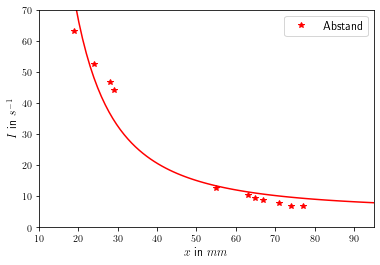

In [42]:
plt.plot(A4_xNa[0, :], A4_xNa[1, :], 'r*', label = 'Abstand')

plt.plot(x, Fit, 'r')

plt.legend(fontsize = 12)

#plt.text(10, 296, '$T_{1}(t) = 289$ $K + 38,2$ $K \cdot [1 - exp(- 0,0344$ $min^{-1} \cdot t )]$', fontsize = 12, color = 'r', rotation = 20) 

plt.xlabel('$x$ in $mm$', fontsize = 12)
plt.ylabel('$I$ in $s^{-1}$', fontsize = 12)

plt.xlim([10, 95])
plt.ylim([0, 70])

plt.savefig('AbstandCs137.png', dpi=300), A

In [43]:
Wurzel = 1 / np.sqrt(A4_xNa[1, :])



Abstandsgerade = sp.stats.linregress(Wurzel, A4_xNa[0, :]) #Cs-137

Wurzel_DF = pd.DataFrame(np.round((Wurzel), 3))
Abstandsgerade.intercept, Abstandsgerade.slope, Wurzel

(-4.219927493952589,
 209.4235108858896,
 array([0.12581852, 0.13781637, 0.14614511, 0.15036319, 0.28250391,
        0.31234752, 0.32826608, 0.33767601, 0.36107907, 0.38518561,
        0.38575837]))

(None, 0.06910146931971234)

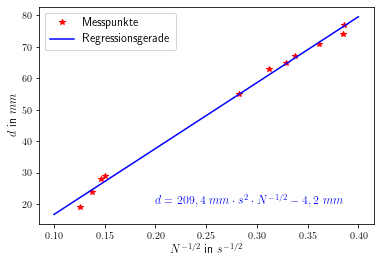

In [44]:
x = np.linspace(0.1, 0.4, num = 50)
plt.plot(Wurzel, A4_xNa[0, :], 'r*', label = 'Messpunkte')

plt.plot(x, Abstandsgerade.intercept + Abstandsgerade.slope*x, '-b', label = 'Regressionsgerade')

#plt.plot(x, Abstandsgera, 'r', label = 'Regressionsgerade Cs-137')

plt.legend(fontsize = 12)

plt.text(0.2, 20, '$d =209,4$ $mm \cdot s^{2} \cdot N^{-1/2} - 4,2$ $mm$', fontsize = 12, color = 'b') 

plt.ylabel('$d$ in $mm$', fontsize = 12)
plt.xlabel('$N^{-1/2}$ in $s^{-1/2}$', fontsize = 12)

#plt.xlim([0, 5])
#plt.ylim([10, 95])


plt.savefig('Abstandsgerade.png', dpi=300), Abstandsgerade.slope**(-1/2)

2.2800749743637652e-05

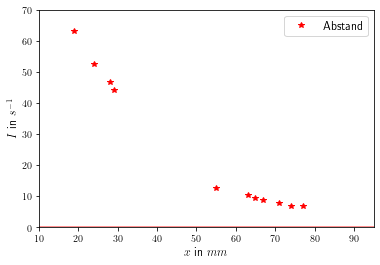

In [45]:
x = np.linspace(0, 95, num = 100)

plt.plot(A4_xNa[0, :], A4_xNa[1, :], 'r*', label = 'Abstand')

plt.plot(x, (Abstandsgerade.intercept + Abstandsgerade.slope*x)**(-2), 'r', )

plt.legend(fontsize = 12)

#plt.text(10, 296, '$T_{1}(t) = 289$ $K + 38,2$ $K \cdot [1 - exp(- 0,0344$ $min^{-1} \cdot t )]$', fontsize = 12, color = 'r', rotation = 20) 

plt.xlabel('$x$ in $mm$', fontsize = 12)
plt.ylabel('$I$ in $s^{-1}$', fontsize = 12)

plt.xlim([10, 95])
plt.ylim([0, 70])

plt.savefig('AbstandCs137V2.png', dpi=300)

Abstandsgerade.slope**(-2)

## 4.5

In [46]:
A5_DickeCs137Am241Co60Co60 = np.array([[0.46, 211, 320, 27, 26], [1, 220, 214, 26, 22], [2.045, 145, 103, 26, 13], [3.045, 135, 57, 19, 21], [4.130, 111, 42, 18, 17]])
#Dicke, Cs-137, Am241, Co-60 bei E=1170 keV, Co-60 bei 1330 keV
A5_DickeCs137Am241Co60Co60	

array([[  0.46 , 211.   , 320.   ,  27.   ,  26.   ],
       [  1.   , 220.   , 214.   ,  26.   ,  22.   ],
       [  2.045, 145.   , 103.   ,  26.   ,  13.   ],
       [  3.045, 135.   ,  57.   ,  19.   ,  21.   ],
       [  4.13 , 111.   ,  42.   ,  18.   ,  17.   ]])

In [47]:
A5_DickeCs137Am241Co60Co60[:, 1::] = A5_DickeCs137Am241Co60Co60[:, 1::] * 0.02

ln_Cs137Am241Co60Co60 =  np.log(I0 / A5_DickeCs137Am241Co60Co60[:, 1::])
ln_Cs137Am241Co60Co60

array([[0.62908837, 0.2126255 , 2.68510963, 2.72284996],
       [0.58731895, 0.61497048, 2.72284996, 2.88990405],
       [1.00421276, 1.34621751, 2.72284996, 3.41599714],
       [1.07567172, 1.93789523, 3.03650752, 2.93642406],
       [1.2714163 , 2.24327688, 3.09057474, 3.14773316]])

In [48]:

Massenabs_Cs137 = sp.stats.linregress(A5_DickeCs137Am241Co60Co60[:, 0], ln_Cs137Am241Co60Co60[:, 0]) #Cs-137
Massenabs_Am214 = sp.stats.linregress(A5_DickeCs137Am241Co60Co60[:, 0], ln_Cs137Am241Co60Co60[:, 1]) #Am214
Massenabs_Co60_1 = sp.stats.linregress(A5_DickeCs137Am241Co60Co60[:, 0], ln_Cs137Am241Co60Co60[:, 2]) #Co-60
Massenabs_Co60_2 = sp.stats.linregress(A5_DickeCs137Am241Co60Co60[:, 0], ln_Cs137Am241Co60Co60[:, 3]) #Co-60
#res.slope, res.intercept

In [49]:
Massenabs = np.array([[Massenabs_Cs137.slope, Massenabs_Cs137.intercept],[Massenabs_Am214.slope, Massenabs_Am214.intercept], [Massenabs_Co60_1.slope, Massenabs_Co60_1.intercept], [Massenabs_Co60_2.slope, Massenabs_Co60_2.intercept]])
Massenabs_DF = pd.DataFrame(np.round(Massenabs, 3))

MAAAS = np.array([Massenabs_Cs137.slope, Massenabs_Am214.slope, Massenabs_Co60_1.slope, Massenabs_Co60_2.slope]) / 2.6
Massenabs_DF = pd.DataFrame(np.round(Massenabs, 3))

MAAS_DF = pd.DataFrame(np.transpose(np.round(MAAAS, 3)))

Export_2 = pd.concat([ Massenabs_DF, MAAS_DF],axis = 1, sort = False )

Export_2.to_csv('45.csv',index=False)

Massenabs_DF, Massenabs, MAAAS

(       0      1
 0  0.191  0.506
 1  0.568  0.059
 2  0.121  2.592
 3  0.088  2.834,
 array([[0.19080208, 0.50598837],
        [0.56757896, 0.05864846],
        [0.12139194, 2.59228517],
        [0.08849606, 2.83355408]]),
 array([0.07338542, 0.2182996 , 0.04668921, 0.03403695]))

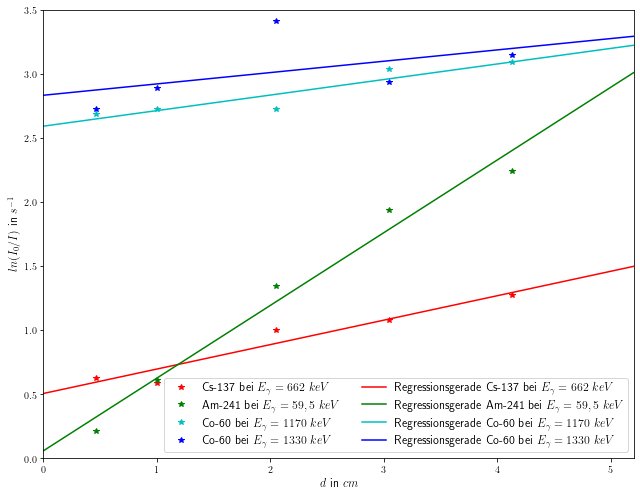

In [51]:
x = np.linspace(0, 5.2, num=60)

plt.rcParams['figure.figsize'] = [9, 7]
plt.rcParams['figure.autolayout'] = True

plt.plot(A5_DickeCs137Am241Co60Co60[:, 0], ln_Cs137Am241Co60Co60[:, 0], 'r*', label = 'Cs-137 bei $E_{\gamma} = 662$ $keV$')
plt.plot(A5_DickeCs137Am241Co60Co60[:, 0], ln_Cs137Am241Co60Co60[:, 1], 'g*', label = 'Am-241 bei $E_{\gamma} = 59,5$ $keV$')
plt.plot(A5_DickeCs137Am241Co60Co60[:, 0], ln_Cs137Am241Co60Co60[:, 2], 'c*', label = 'Co-60  bei $E_{\gamma} = 1170$ $keV$')
plt.plot(A5_DickeCs137Am241Co60Co60[:, 0], ln_Cs137Am241Co60Co60[:, 3], 'b*', label = 'Co-60  bei $E_{\gamma} = 1330$ $keV$')

plt.plot(x, Massenabs_Cs137.intercept + Massenabs_Cs137.slope*x, '-r', label = 'Regressionsgerade Cs-137  bei $E_{\gamma} = 662$ $keV$')
plt.plot(x, Massenabs_Am214.intercept + Massenabs_Am214.slope*x, '-g', label = 'Regressionsgerade Am-241 bei $E_{\gamma} = 59,5$ $keV$')
plt.plot(x, Massenabs_Co60_1.intercept + Massenabs_Co60_1.slope*x, '-c', label = 'Regressionsgerade Co-60 bei $E_{\gamma} = 1170$ $keV$')
plt.plot(x, Massenabs_Co60_2.intercept + Massenabs_Co60_2.slope*x, '-b', label = 'Regressionsgerade Co-60 bei $E_{\gamma} = 1330$ $keV$')



#plt.legend(fontsize = 12, loc = 'upper left', bbox_to_anchor = (0.09, -0.1), ncol = 2)
plt.legend(fontsize = 12, loc = 'best', ncol = 2)

#plt.text(10, 296, '$T_{1}(t) = 289$ $K + 38,2$ $K \cdot [1 - exp(- 0,0344$ $min^{-1} \cdot t )]$', fontsize = 12, color = 'r', rotation = 20) 

plt.xlabel('$d$ in $cm$', fontsize = 12)
plt.ylabel('$ln(I_{0}/I)$ in $s^{-1}$', fontsize = 12)

plt.xlim([0, 5.2])
plt.ylim([0, 3.5])

plt.savefig('Massenabsorptionskoeffizienten.png', dpi=600)